<h2 align="center">Automatic Machine Learning with H2O AutoML</h2>

### Task 2: Importing Packages

In [7]:
import pandas as pd
pd.options.display.max_rows = 999
import numpy as np
import matplotlib.pyplot as plt

# Loading and Exploring the Data

In [8]:
xls = pd.ExcelFile('data/bank_term_deposit_marketing_analysis.xlsx')


In [9]:
xls. sheet_names 

['PROCEDURE',
 'DATA DESCRIPTION',
 'Step 1 - Collect Information',
 'CLIENT_INFO',
 'LOAN_HISTORY',
 'MARKETING HISTORY',
 'SUBSCRIPTION HISTORY',
 'Step 2 - Merge Information',
 'CLIENT_MERGE',
 'Step 3 - Marketing Analysis',
 'DAILY RANGE',
 'JOB ANALYSIS',
 'Sheet3']

In [11]:
client_info = pd.read_excel(xls, 'CLIENT_INFO')
loan_history = pd.read_excel(xls, 'LOAN_HISTORY')
marketing_history = pd.read_excel(xls, 'MARKETING HISTORY')
subscription_history = pd.read_excel(xls, 'SUBSCRIPTION HISTORY')

In [12]:
client_info.head()

,ID,AGE,JOB,MARITAL,EDUCATION
0,2836,58,management,married,tertiary
1,2837,44,technician,single,secondary
2,2838,33,entrepreneur,married,secondary
3,2839,47,blue-collar,married,unknown
4,2840,33,unknown,single,unknown


In [13]:
loan_history.head()

,ID,DEFAULT,BALANCE,HOUSING,LOAN
0,2836,no,2143,yes,no
1,2837,no,29,yes,no
2,2838,no,2,yes,yes
3,2839,no,1506,yes,no
4,2840,no,1,no,no


In [14]:
marketing_history.head()

,ID,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME
0,2836,unknown,5,may,261,1,-1,0,unknown
1,2837,unknown,5,may,151,1,-1,0,unknown
2,2838,unknown,5,may,76,1,-1,0,unknown
3,2839,unknown,5,may,92,1,-1,0,unknown
4,2840,unknown,5,may,198,1,-1,0,unknown


In [15]:
subscription_history.head()

,ID,TERM_DEPOSIT
0,2836,no
1,2837,no
2,2838,no
3,2839,no
4,2840,no


In [16]:
df = pd.merge(client_info, loan_history, on=['ID'])
df = pd.merge(df, marketing_history, on=['ID'])
df = pd.merge(df, subscription_history, on=['ID']) 
df.head()              
              

,ID,AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,TERM_DEPOSIT
0,2836,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,2837,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,2838,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,2839,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,2840,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [18]:
df = df.drop(['ID'], axis=1)

KeyError: "['ID'] not found in axis"

# Data Prep & Start H2O

In [22]:
import h2o
h2o.init()


Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.7" 2020-04-14; OpenJDK Runtime Environment (build 11.0.7+10-post-Ubuntu-2ubuntu218.04); OpenJDK 64-Bit Server VM (build 11.0.7+10-post-Ubuntu-2ubuntu218.04, mixed mode, sharing)
  Starting server from /home/rhyme/.local/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp4t725j3l
  JVM stdout: /tmp/tmp4t725j3l/h2o_rhyme_started_from_python.out
  JVM stderr: /tmp/tmp4t725j3l/h2o_rhyme_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,23 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.3
H2O_cluster_version_age:,"3 years, 3 months and 5 days !!!"
H2O_cluster_name:,H2O_from_python_rhyme_pvxbql
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.920 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


In [23]:
h2o_df = h2o.H2OFrame(df)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [24]:
h2o_df.describe()

Rows:45211
Cols:17




,AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,TERM_DEPOSIT
type,int,enum,enum,enum,enum,int,enum,enum,enum,int,enum,int,int,int,int,enum,enum
mins,18.0,,,,,-8019.0,,,,1.0,,0.0,1.0,-1.0,0.0,,
mean,40.93621021432807,,,,,1362.2720576850802,,,,15.806418791886923,,258.16307978146915,2.7638406582468997,40.19782796222158,0.5803233726305561,,
maxs,95.0,,,,,102127.0,,,,31.0,,4918.0,63.0,871.0,275.0,,
sigma,10.618762040975398,,,,,3044.7658291685216,,,,8.32247615304459,,257.52781226517124,3.0980208832791805,100.12874599059822,2.303441044931215,,
zeros,0,,,,,3514,,,,0,,3,0,0,36954,,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,no
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,no


In [25]:
train, test = h2o_df.split_frame(ratios=[.75])

x = train.columns
y = 'TERM_DEPOSIT'
x.remove(y)

# Run H2O AutoML

In [26]:
from h2o.automl import H2OAutoML

In [27]:
df.TERM_DEPOSIT.value_counts()

no     39922
yes     5289
Name: TERM_DEPOSIT, dtype: int64

In [29]:
aml = H2OAutoML(max_runtime_secs=600,
               balance_classes=True,
                stopping_metric='logloss',
               project_name='Final',
                seed=1)
%time aml.train(x=x, y=y, training_frame=train)

AutoML progress: |████████████████████████████████████████████████████████| 100%
CPU times: user 1min 13s, sys: 937 ms, total: 1min 14s
Wall time: 9min 41s


# AutoML Leaderboard and Ensemble Exploration

In [30]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_BestOfFamily_AutoML_20230819_143138,0.935665,0.219731,0.626168,0.174947,0.255778,0.0654223
XGBoost_grid__1_AutoML_20230819_143138_model_2,0.934757,0.199122,0.624541,0.174883,0.250123,0.0625615
StackedEnsemble_AllModels_AutoML_20230819_143138,0.93405,0.213978,0.625986,0.182897,0.25385,0.0644398
GBM_grid__1_AutoML_20230819_143138_model_1,0.932346,0.201585,0.613869,0.168801,0.25181,0.0634081
GBM_grid__1_AutoML_20230819_143138_model_2,0.931191,0.20909,0.616213,0.168094,0.257128,0.0661146
XGBoost_grid__1_AutoML_20230819_143138_model_1,0.931019,0.203922,0.62203,0.164341,0.252485,0.0637487
XGBoost_3_AutoML_20230819_143138,0.9295,0.20546,0.619359,0.170109,0.252332,0.0636715
XGBoost_grid__1_AutoML_20230819_143138_model_4,0.928504,0.213954,0.601826,0.162954,0.258199,0.0666667
GBM_2_AutoML_20230819_143138,0.927506,0.227194,0.606568,0.18074,0.267505,0.0715587
XGBoost_grid__1_AutoML_20230819_143138_model_3,0.926546,0.214305,0.589247,0.178171,0.259448,0.0673132


In [31]:
se = aml.leader
metalearner = h2o.get_model(se.metalearner()['name'])

In [32]:
metalearner.varimp()

[('XGBoost_grid__1_AutoML_20230819_143138_model_2',
  0.76109884455617,
  1.0,
  0.5136315880437077),
 ('GBM_grid__1_AutoML_20230819_143138_model_1',
  0.6307063829926797,
  0.8286786762374762,
  0.42563554445381235),
 ('DeepLearning_1_AutoML_20230819_143138',
  0.047959228216520815,
  0.06301314022423452,
  0.03236553928099441),
 ('DRF_1_AutoML_20230819_143138',
  0.03147370656954857,
  0.041352981672048476,
  0.021240197646556595),
 ('XRT_1_AutoML_20230819_143138',
  0.010560975944333447,
  0.013875958451220633,
  0.00712713057492896),
 ('GLM_1_AutoML_20230819_143138', 0.0, 0.0, 0.0)]

# Base Learner XGBoost Model Exploration

In [33]:
model =h2o.get_model('XGBoost_grid__1_AutoML_20230819_143138_model_2')

In [34]:
model.model_performance(test)


ModelMetricsBinomial: xgboost
** Reported on test data. **

MSE: 0.0617378083111564
RMSE: 0.24847094057687388
LogLoss: 0.19618301030808236
Mean Per-Class Error: 0.12499974567614225
AUC: 0.935044982456349
AUCPR: 0.6213376745420447
Gini: 0.8700899649126981

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.24640519597700664: 


,,no,yes,Error,Rate
0,no,9054.0,883.0,0.0889,(883.0/9937.0)
1,yes,296.0,990.0,0.2302,(296.0/1286.0)
2,Total,9350.0,1873.0,0.1051,(1179.0/11223.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.246405,0.626781,229.0
1,max f2,0.139782,0.743721,278.0
2,max f0point5,0.384402,0.594354,179.0
3,max accuracy,0.639957,0.908937,94.0
4,max precision,0.985309,1.000000,0.0
5,max recall,0.000852,1.000000,397.0
6,max specificity,0.985309,1.000000,0.0
7,max absolute_mcc,0.184958,0.585683,256.0
8,max min_per_class_accuracy,0.150611,0.868874,273.0
9,max mean_per_class_accuracy,0.124404,0.875000,286.0



Gains/Lift Table: Avg response rate: 11.46 %, avg score: 11.82 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010069,0.891457,7.027987,7.027987,0.805310,0.930981,0.805310,0.930981,0.070762,0.070762,602.798690,602.798690
1,,2,0.020048,0.829123,6.623216,6.826501,0.758929,0.859304,0.782222,0.895302,0.066096,0.136858,562.321567,582.650078
2,,3,0.030028,0.757246,7.012817,6.888422,0.803571,0.792449,0.789318,0.861119,0.069984,0.206843,601.281660,588.842176
3,,4,0.040007,0.703390,5.766094,6.608465,0.660714,0.730084,0.757238,0.828433,0.057543,0.264386,476.609365,560.846464
4,,5,0.050076,0.658594,5.019991,6.289074,0.575221,0.680772,0.720641,0.798743,0.050544,0.314930,401.999064,528.907396
5,,6,0.100062,0.451193,4.371308,5.331045,0.500891,0.552873,0.610864,0.675917,0.218507,0.533437,337.130846,433.104507
6,,7,0.150049,0.299543,3.609052,4.757388,0.413547,0.371679,0.545131,0.574565,0.180404,0.713841,260.905182,375.738817
7,,8,0.200036,0.177305,2.706789,4.244967,0.310160,0.230311,0.486414,0.488540,0.135303,0.849145,170.678887,324.496670
8,,9,0.300009,0.067234,0.948932,3.146615,0.108734,0.111446,0.360558,0.362879,0.094868,0.944012,-5.106827,214.661468
9,,10,0.399982,0.031334,0.357794,2.449565,0.040998,0.046683,0.280686,0.283848,0.035770,0.979782,-64.220607,144.956481


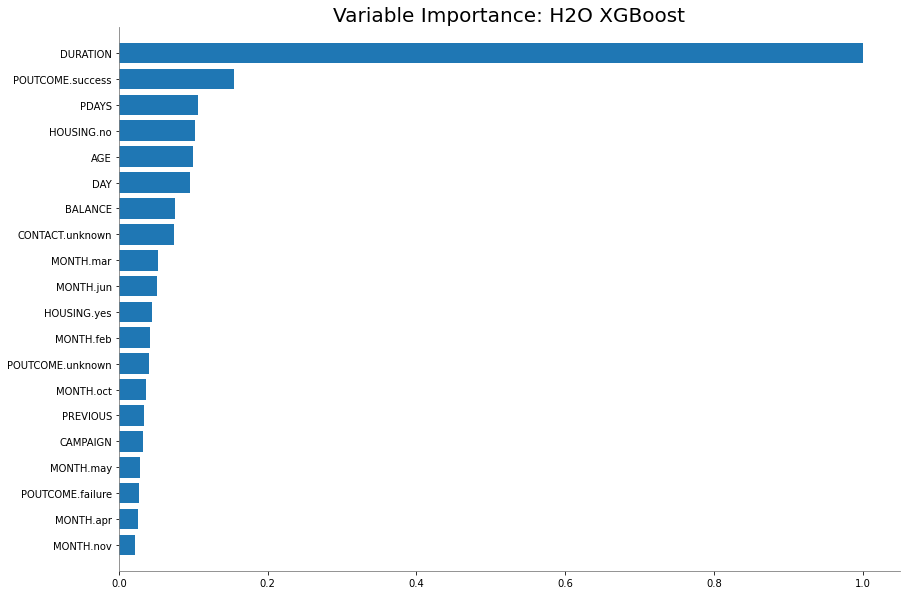

In [35]:
model.varimp_plot(num_of_features=20)